URL a GUTHUB

## **Abstract**

Se ha analizado una base de datos que contiene informacion sobre infantes que padecen y no padecen diabetes, acompañado de una serie de variables las cuales diactan el resultado positivo o negativo de la enfermedad. 

Se he importado la data de un repositorio, en este caso fue "Kaggle". Posterior a ello, se tenía que realizar un proceso de Data Wrangling, el cual es este caso fue omitido, pues la data venia limpia de su origen. De igual forma se realizaron interpretaciones por medio de graficos visuales para comprender en que punto se estaba. 

Se ha aplicado un algoritmo de regresion usando la libreria 'skit-learn' para poder determinar si un infante podria o no tener diabetes con base en las variables que se presentan. 

Los resultados no fueron del todo favorables, pues se esperaba un porcentaje de acertividad del 80% sin embrgo resulto ser de menos del 75%. Se tendrá que trabajar la data para subir este porcentaje. 

El objetivo de este analisis es, en principio promover la salud, pero de igual forma ayudar a los adultos con infantes a que puedan tener un control mucho mas 
adecuado con ellos. Al mismo tiempo, se intenta especular con acertividada si es que el infante podria tener o no diabetes de una manera mucho mas rapida y sencilla, posterior a la integracion de los datos del infante del adulto se recomendaria acudir con un profesional de la salud llevando consigo los resultados que se obtuvieron en este analisis. 


## **Introducción**

Durante los ultimos años ha aumentado el nivel de diabetes que padecen los niños, esto debido a diferentes factores, que tienen que ver con los cambios mundiales que hemos sufrido a nivel social, politico e inclusive cultural.

En definitiva, el consumo de alimentos y habitos generales han cambiado radicalemte, sobre todo despues del COVID-19. El cuerpo humano ha sufrido un despues de todo esto, a nivel fisiologico y psicologico. 

Es por ello que, el presente trabajo es sobre ello; la diabetes. Esta enfermedad ha causado la muerte de multiples personas mayores, y entra en un campo sensible cuando se detecta que un niño la padece.

A lo largo del trabajo se implementan diferentes estrategias para poder leer los datos que se han sido proveidos y entonces lograr tener un algoritmo que pueda predecir si un niño tiene o no diabetes, todo esto con base en parametros ya preestablecidos. 

La forma en la que se abordara el tema no sera de manera tecnica en cuanto al campo de la medicina, si no mas estadistica, y limitando la verbalización a lo que se conoce. 
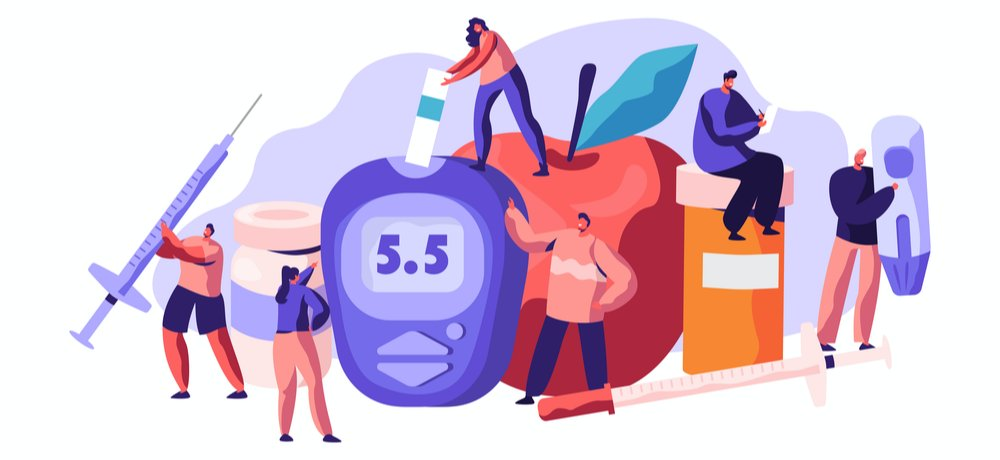

## **Objetivo General**

Obtener un resultado optimo en donde los datos que se adieran al final para comprobar si en verdada logra predecir correctamente nuestro algortimo, tengan sentido en comparación con la data completa. 

## **Objetivos Especificos**



*   Lograr un algoritmo funcional para su implementación con nuevos datos
*   Obtener interpretaciones de graficos de facil lectura para todo tipo de publico 
*   Alcanzar una alto porcentaje de predicción, de esta manera tener certeza de que el algoritmo tiene potencial para prevenir la diabetes




## **Hipotesis**

Se llega a un porcentaje muy cercano a un 80% de prediccion acertiva por medio del entrenamiento de los mismos datos. De igual forma, se encunetran correlaciones de variables poco convencionales, pero que ayudan al desarrollo optimo del presente trabajo. 

Se obtienen datos optimos para poder deplegarlos graficamente y asi obtener feedback del equipo. Dichos graficos logran una curva de aprendizaje bastante baja, por lo cual la lectura de las mismas es simple y amigable con quienes desean conocer el trabajo. 

Los datos obtenidos son optimos para su utilización con mas datos aun no conocidos por el algoritmo, lo que significa que puede ser implementado con nuevas personas las cuales acudan a conocer si pueden estar en riesgo de tener diabetes o si es que la tienen y de estea manera, profecionales terceros controlar todo el proceso posterior. 

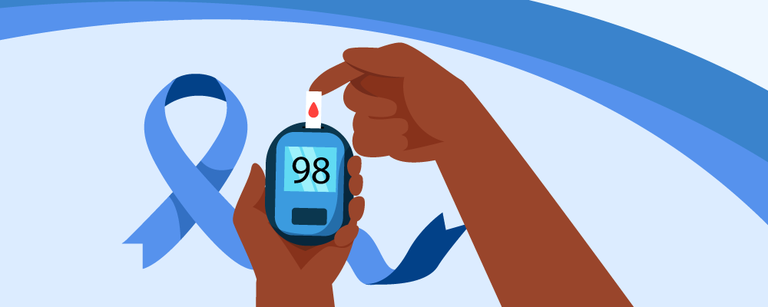

## **¿Que contiene la base de datos?**

Dentro de la base de datos que se analizara y con la que se hará todo el proceso contiene datos numericos en su totalidad de tipo float. 


Entre sus especificidades contiene features como Indice de masa corporal, el sexo, la edad.


La base de datos unicamnete contiene datos de niños, pues el analisis se basa en la diabetes en niños. El rango de edad en la que se encuentran es entre los 0 a 15 años.


La base de datos contiene 70692 filas y 18 columnas. Esta misma es una base de datos registrada con features en ingles, por lo cual el significado de cada uno de ellos se encuentra en la sección de "Columnas", la cual se encuentra mas abajo dentro del notebook.  



## **Preguntas de investigación previas al conocimiento de la data**



*   ¿Cual es la distribución en cantidad de diabetes en los infantes?
*   ¿Cuantos infantes varones y mujeres tienen diabetes?
*   ¿Cual es la distribucion por edades del padecimiento de diabetes en los infantes?
*   ¿Existe alguna variable que tenga relación con otra?



# **Importación de datos y librerias 🛃**

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [ ]:
!pip install requests

In [ ]:
import numpy as np

import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

import seaborn as sns

import plotly.express as px

import ydata_profiling

import requests

from pandas import json_normalize

In [ ]:
url = 'https://raw.githubusercontent.com/angeltalpa/ds_coder_customers/main/diabetes_data.csv'

df = pd.read_csv(url)

# link dataset = https://www.kaggle.com/datasets/prosperchuks/health-dataset?select=diabetes_data.csv

#**Columnas**

**Age:**
Edad de la persona
___

**Sex:**
Sexo de la persona

1: male
0: female
___

**HighChol:**

0 = no high cholesterol 

1 = high cholesterol
___

**CholCheck:**

0 = no cholesterol check in 5 years 

1 = yes cholesterol check in 5 years
___

**BMI:**
Body Mass Index

___

**Smoker:**
Have you smoked at least 100 cigarettes in your entire life? 

 0 = no 1 = yes

___

**HeartDiseaseorAttack:**
coronary heart disease (CHD) or myocardial infarction (MI) 

0 = no 

1 = yes

___
**PhysActivity:**
physical activity in past 30 days - not including job 

0 = no 

1 = yes
___

**Fruits:**
Consume Fruit 1 or more times per day 

0 = no 

1 = yes
___

**Veggies:**
Consume Vegetables 1 or more times per day 

0 = no 

1 = yes
___

**HvyAlcoholConsump:**
(adult men >=14 drinks per week and adult women>=7 drinks per week) 

0 = no 

1 = yes

___

**GenHlth:**
Would you say that in general your health is: scale 1-5 

1 = excellent 

2 = very good 

3 = good 

4 = fair 

5 = poor

___

**MenHlth**:

days of poor mental health scale 1-30 days

____

**PhysHlth**:
physical illness or injury days in past 30 days scale 1-30

___

**DiffWalk**:

Do you have serious difficulty walking or climbing stairs? 

0 = no 

1 = yes

___

**Stroke**:
you ever had a stroke. 

0 = no 

1 = yes

____

**HighBP**:
0 = no high BP 

1 = high BP

___


**Diabetes**

0 = no diabetes


1 = diabetes






# **Conocemos la data**🔢

In [ ]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [ ]:
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [ ]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.count(axis = 0)

Age                     70692
Sex                     70692
HighChol                70692
CholCheck               70692
BMI                     70692
Smoker                  70692
HeartDiseaseorAttack    70692
PhysActivity            70692
Fruits                  70692
Veggies                 70692
HvyAlcoholConsump       70692
GenHlth                 70692
MentHlth                70692
PhysHlth                70692
DiffWalk                70692
Stroke                  70692
HighBP                  70692
Diabetes                70692
dtype: int64

In [ ]:
df.shape

(70692, 18)

In [ ]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
univ_01 = df.mean()   
univ_01 = pd.DataFrame(univ_01)


univ_01.reset_index(inplace= True)

univ_01 =univ_01.rename(columns= { 'index': 'Parametros', 0: 'Media_Individual'})

univ_01

,Parametros,Media_Individual
0,Age,8.584055
1,Sex,0.456997
2,HighChol,0.525703
3,CholCheck,0.975259
4,BMI,29.856985
5,Smoker,0.475273
6,HeartDiseaseorAttack,0.147810
7,PhysActivity,0.703036
8,Fruits,0.611795
9,Veggies,0.788774


In [ ]:
df['Diabetes'].value_counts() #De la columna diabetes, se agruparon por valores, y se conto cuantos valores hay por cada grupo

0.0    35346
1.0    35346
Name: Diabetes, dtype: int64

0 --- No Diabetes

1--- Diabetes

In [ ]:
df.groupby('Diabetes').mean() #Se agrupo la data por la columna diabetes y se saco el promedio respecto a ella.

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
Diabetes,,,,,,,,,,,,,,,,,
0.0,7.789057,0.434872,0.381288,0.957336,27.769960,0.432326,0.072738,0.775533,0.638149,0.821140,0.061902,2.383183,3.042268,3.666355,0.134244,0.031885,0.374243
1.0,9.379053,0.479121,0.670118,0.993182,31.944011,0.518220,0.222882,0.630538,0.585441,0.756408,0.023539,3.290981,4.461806,7.954479,0.371216,0.092457,0.752674


Lo que nos dice esto, es el promedio de cada uno de los parametros (columnas) con respecto a la columna "Diabetes".

-



Por ejemplo, si 0 indica la incexistencia de diabetes y 1 la existencia, entonces, el promedio de edad de personas que no tienen diabetes rondan entre los 7 años.

-

De igual forma quienes no tienen diabetes cuentan con un una medida de colesterol mas bajo que aquellos que si tienen.

-

Esto nos da bastante información ya que podemos saber cuales podrian ser los posibles parametros/features/columnas que toman relevencia al momento de considerar si alguien tiene o no tiene diabetes.

# **EDA** 📊 🍫

## Pararametros importantes para el padecimiento de diabetes (Hipotesis) 🤔

In [ ]:
# Analisis Univariado
univ_01 = univ_01.nlargest(n=5, columns=['Media_Individual'])

fig = px.pie(univ_01, values='Media_Individual', names=univ_01.Parametros, title="Top 5 de parametros con la media mas alta")

fig.update_traces(textposition='outside', textinfo='percent+label') 

fig.show()

En este grafico se muestra el top 5 de parametros con la media mas alta. 

Se decicio hacer esto pues, analizando los datos de primera vista, se especula que entre mas alta la media de cada parametro, este toma relevancia en cuanto a si el niño tiende a padecer diabetes.

Esto es especulación absoluta, un hipotesis por lo cual se debe de tomar con total cuidado.

## Data Profiling 📔

In [ ]:
profile = ydata_profiling.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Por medio de la libreria `Pandas Profiling`, se realizo este despliegue de datos estadisticos.

Como resultado, me gustaría destacar la tabla de correlaciones, pues en ella se puede apreciar que variables tienen mas correlación entre ellas. 

En este caso, se ha detectado que la **Salud Fisica y la dificultad para caminar**, tienen correlación; esto tiene sentido, ya el hecho de no realizar activiad fisica, causa fatiga en cuanto al desempeño del cuerpo humano. 

Otra de las realciones que se encontro fue la **Salud General con la Dificultad de Caminar**. Esta tiene el mismo sentido que la anterior mencioanda.

Aunque si bien, no se existe mucha relación entre las siguientes variables a mencionar, es verdad que destacan un poco entre todas las que no tienen absoluta relacion. 

**Por ejemplo, la edad pareciera tener un poco de correlación con lo que es el colesterol alto, al igual que con la presion arterial.**

Otro ejemplo podria ser el colesterol alto con la presion arterial. 

-

Las correlaciones que existen son muy difusas, pero se tiende un poco a tenerlas con cada una de las variables existentes. 


---


`Con este analisis se rompe la hipotesis lo que se habia hecho anteriormente en el grafico de pastel`

In [ ]:
df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


## ¿Como es la distribucion de diabetes en los niños? 🚸

<ipython-input-12-95af3f5e2736>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


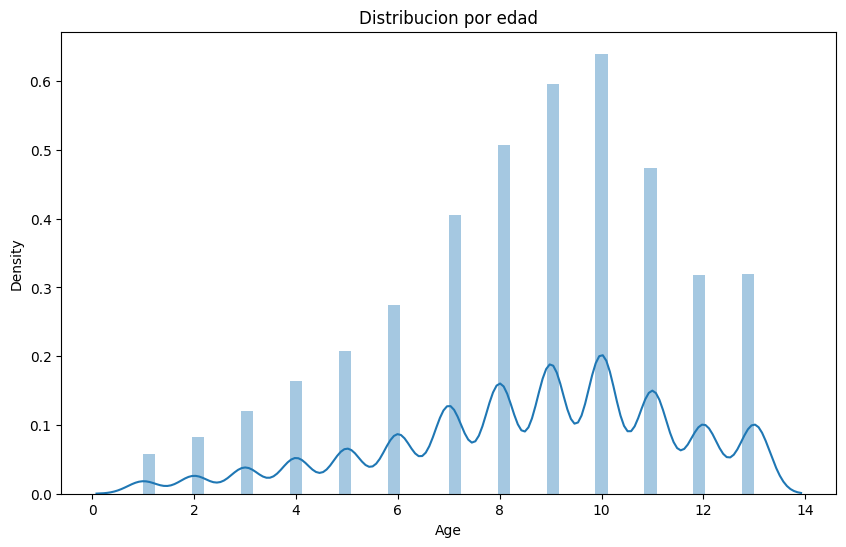

In [ ]:
plt.figure(figsize=(10,6))

sns.distplot(df['Age'])

plt.title('Distribucion por edad')

plt.show()

## Cantidad de infantes hombres vs mujeres que se registraron 🌎

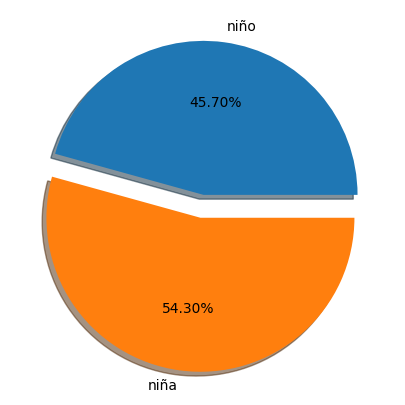

In [ ]:
plt.figure(figsize=(7, 5))

sex_count = [len(df[df['Sex'] == 1.0]),len(df[df['Sex'] == 0])]

label = ['niño', 'niña']

explode = (0.05, 0.1)

plt.pie(sex_count, labels = label, explode = explode, autopct='%4.2f%%', shadow = True)

plt.show()

## Padecimiento de diabetes hombres vs mujeres 💉

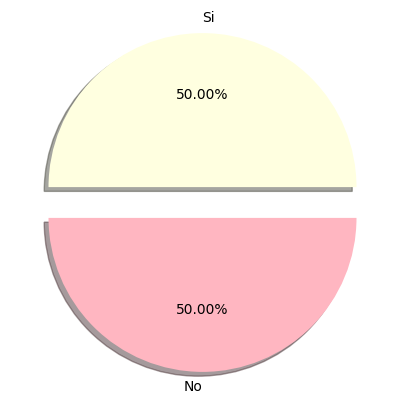

In [ ]:
plt.figure(figsize=(7, 5))

diabetes_disease = [len(df[df['Diabetes'] == 1]),
                    len(df[df['Diabetes'] == 0])]

label = ['Si', 'No']

explode = (0.1, 0.1)

colors = ['red', 'lightpink']

plt.pie(diabetes_disease, 
        labels = label, 
        explode = explode, 
        autopct='%4.2f%%', 
        shadow = True,
        colors = colors)

plt.show()

## Distribución de padecimiento de diabetes 🩸

### Distribución por sexo 🧒 👧

In [ ]:
df_copy_ = df.copy()

In [ ]:
df_copy_.loc[df_copy_['Sex'] == 0, 'Sex'] = 'niña'
df_copy_.loc[df_copy_['Sex'] == 1, 'Sex'] = 'niño'
    
df_copy_

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,niño,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,niño,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,niño,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,niño,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,niña,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,niña,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,niño,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,niña,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,niña,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


[Text(0.5, 1.0, 'Distribuciond de sexo por padecimiento de diabetes'),
 Text(0.5, 0, 'Sexo'),
 Text(0, 0.5, 'Cantidad de niños')]

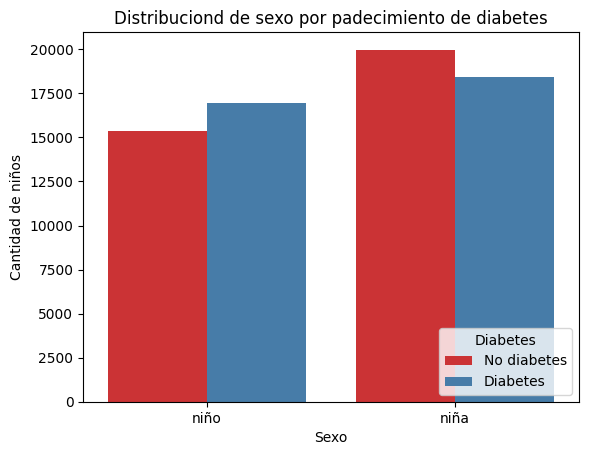

In [ ]:
p1 = sns.countplot(x='Sex', data=df_copy_, hue='Diabetes', palette='Set1').set(title = 'Distribuciond de sexo por padecimiento de diabetes', xlabel = 'Sexo', ylabel = 'Cantidad de niños')

plt.legend(title='Diabetes', loc='lower right', labels=['No diabetes', 'Diabetes'])


p1

### Distribucion por edad 🧙

In [ ]:
df_copy = df.copy()

df_copy.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
age_bins = [0,3,6,10,15]

df_copy['bin_age'] = pd.cut (df_copy['Age'], bins = age_bins)

df_copy

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes,bin_age
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0,"(3, 6]"
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,"(10, 15]"
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0,"(10, 15]"
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,"(10, 15]"
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,"(6, 10]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,"(3, 6]"
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,"(6, 10]"
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0,"(10, 15]"
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0,"(10, 15]"


In [ ]:
df_copy['Age'].value_counts()

10.0    10856
9.0     10112
8.0      8603
11.0     8044
7.0      6872
13.0     5426
12.0     5394
6.0      4648
5.0      3520
4.0      2793
3.0      2049
2.0      1396
1.0       979
Name: Age, dtype: int64

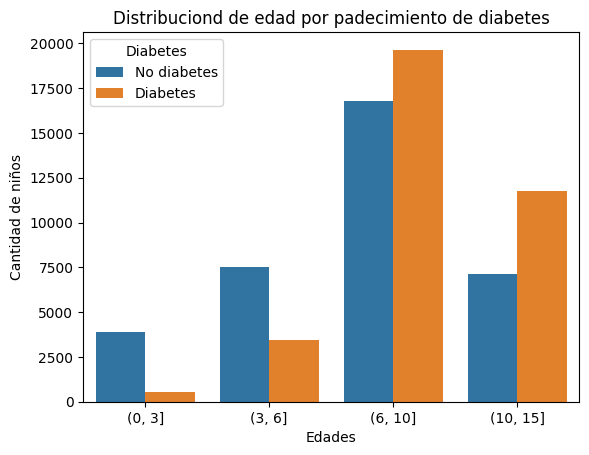

In [ ]:
p2 = sns.countplot (x='bin_age', data = df_copy, hue = 'Diabetes').set(title = 'Distribuciond de edad por padecimiento de diabetes', xlabel = 'Edades', ylabel = 'Cantidad de niños')

plt.legend(title='Diabetes', loc='upper left', labels=['No diabetes', 'Diabetes'])



plt.show(p2)


# **Aplicando algoritmo**💻


Primero se separara la data

In [ ]:
X = df.drop(columns = 'Diabetes', axis = 1) # Usamos el parametro "Axis = 1". Pues es necesario al momento de tirar una columna, d
                                            # de haber sido una "row", se escribiria 0


Y = df['Diabetes']  # En esta veriable estaremos guardando la columna "Diabetes"

In [ ]:
Y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
70687    1.0
70688    1.0
70689    1.0
70690    1.0
70691    1.0
Name: Diabetes, Length: 70692, dtype: float64

In [ ]:
X.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


### **Estandarizando la data**🏁

Hacemos esto debido a que, si se desea realizar machine learning, es mas facil que la maquina lo entienda pode medio una estandarización. 
  
-

La estandarización no es mas que convertir los datos que se tienen a datos con numero "raros". 

Usaremos la libreria **Sklearn** para poder hacer la **estandarización**, en especifico usaremos "*StandardScaler*" ⚙

In [ ]:
scaler = StandardScaler() #Metemos en una variable el modulo StandarScala, perteneciente a el paquete sklearn de la libreria numpy

In [ ]:
scaler.fit(X) # Basicamente es como si se estuviese haciendo lo siguiente:
              # StandardScaler().fit(X) 
              
              # Se hace hace de esta manera para poder acceder a estos datos mas adelante
              # De haberlo hecho como en el parrafo anterior, al no estar metido en una variable
              # Acceder a ella mas adelante, seria imposible. 

StandardScaler()

**NOTA**

El objetivo de ***StandardScaler*** es estandarizar las características de los datos, lo que implica ajustar la media y la desviación estándar de cada característica en función de los datos proporcionados.

In [ ]:
standarized_data = scaler.transform(X) #El resultado de esto será un array de numpy, lo cual ayudara al proceso de machine learning

In [ ]:
print(standarized_data)

[[-1.60723742  1.09004602 -1.05279808 ... -0.58155367 -0.25747348
   0.88020109]
 [ 1.19768093  1.09004602  0.94984976 ... -0.58155367  3.88389516
   0.88020109]
 [ 1.54829572  1.09004602 -1.05279808 ... -0.58155367 -0.25747348
  -1.13610402]
 ...
 [ 1.54829572 -0.91739246  0.94984976 ...  1.71953175 -0.25747348
   0.88020109]
 [ 0.84706614 -0.91739246  0.94984976 ...  1.71953175 -0.25747348
   0.88020109]
 [ 0.14583655 -0.91739246  0.94984976 ... -0.58155367 -0.25747348
   0.88020109]]


In [ ]:
X = standarized_data

Y = df['Diabetes']

In [ ]:
print(X)

print(Y)

[[-1.60723742  1.09004602 -1.05279808 ... -0.58155367 -0.25747348
   0.88020109]
 [ 1.19768093  1.09004602  0.94984976 ... -0.58155367  3.88389516
   0.88020109]
 [ 1.54829572  1.09004602 -1.05279808 ... -0.58155367 -0.25747348
  -1.13610402]
 ...
 [ 1.54829572 -0.91739246  0.94984976 ...  1.71953175 -0.25747348
   0.88020109]
 [ 0.84706614 -0.91739246  0.94984976 ...  1.71953175 -0.25747348
   0.88020109]
 [ 0.14583655 -0.91739246  0.94984976 ... -0.58155367 -0.25747348
   0.88020109]]
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
70687    1.0
70688    1.0
70689    1.0
70690    1.0
70691    1.0
Name: Diabetes, Length: 70692, dtype: float64


### **Dividiendo en test y train** 🧪 🏋

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state=2 )

**nota.** 👈

¿Qué es *random_state*? 😥

Al establecer un valor específico para **random_state**, como en este caso **random_state=2**, se asegura que cada vez que ejecutes este código, obtendrás la misma división aleatoria de los datos.

-

La elección del número 2 para random_state es arbitraria y no tiene un significado especial. Podrías elegir cualquier número entero no negativo como semilla, siempre y cuando utilices el mismo número en todas las ejecuciones posteriores si deseas obtener la misma división aleatoria.

-

El propósito principal de utilizar random_state es permitir la reproducibilidad. Si compartes tu código con otros o necesitas repetir el experimento en el futuro, al establecer una semilla específica, obtendrás la misma división de los datos en conjuntos de entrenamiento y prueba, lo que facilita la comparación de resultados y la validación del modelo.

In [ ]:
print(X.shape, X_train.shape, X_test.shape) #Ejecutamos la forma de todas nuestras variables X.        

(70692, 17) (56553, 17) (14139, 17)


Al ejecutar todas nuestras variables X, se ve claramente como es que estas cambiaron, debido a que estamos imprimiendo las siguientes



1.   Forma de variable X original
2.   Forma de variable X con datos SOLO para ENTRENAMIENTO
3.   Forma de variable X con datos SOLOS para TEST


-

Por ejemplo, para nuestra variable X de entrenamiento tenemos 49484 filas y 17 columnas **(49484, 17)**


### **Entrenando al modelo** 🏋

In [ ]:
classifier = svm.SVC(kernel = 'linear') 

# svm = Support Vector Machine

#SVC = Support Vector Classification

¿Que realiza un SVM? 😵

Lo que he entendido que realiza es una analisis de los datos que le hayamos metido, despues de ello, crea una linea imaginaria que logra separar cada uno de los datos, agrupadolos.

-

Esta linea es llamada "hiperplano" y se dibuja sobre un plano de dos dimensiones, en donde se encuentran los datos. 

-

El SVM hace que esta esta linea, como ya se ha mencionado, divida todos los datos, encontrando asi patrones para que en el futuro al integrar nuevos datos, por medio de la linea que tenemos como base, se pueda predecir el resultado. 

Cabe decir que, al clasificar por medio del hiperplano, es donde entra el SVC, ya que por medio de un vector clasifica los datos. 


-

Pienso que por eso se llama "Support Vector Machine", una maquina de vectores de ayuda. 


In [ ]:
classifier.fit(X_train, Y_train) #Por medio del svm.SVC, metemos los datos que queremos clasificar.

SVC(kernel='linear')

### **Testeando el modelo en entrenamiento** 🤛

In [ ]:
# X_train_prediction = classifier.predict(X_train)

# training_data_accuracy = accuracy_score(X_train_prediction) #<-- Es necesario integrar el Y_train

**nota**

La razón de añadir Y_train en la función accuracy_score es para evaluar la precisión del modelo al comparar las predicciones con las etiquetas reales correspondientes.

Al incluir Y_train, se compara cada predicción hecha por el modelo con la etiqueta real correspondiente en el conjunto de entrenamiento. Esto permite calcular la precisión del modelo en los datos de entrenamiento y determinar qué tan bien está ajustando el modelo a los datos conocidos.

In [ ]:
X_train_prediction = classifier.predict(X_train)

training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

**nota**

Dentro de Classifier se ha guardado los modelos de entrenamiento X_train y Y_train ya ajustados, por lo cual lo siguiente que se realizo fue aplicar la funcion predict.

Al proporcionar X_train como entrada para la función predict, se le indica al clasificador que haga predicciones utilizando el conjunto de entrenamiento. Esto nos permite obtener las predicciones del modelo sobre los datos de entrenamiento y compararlas con las etiquetas reales para evaluar el rendimiento del modelo.

In [ ]:
print('porcentaje de acertividad: ', training_data_accuracy)

porcentaje de acertividad:  0.7474581366152105


Lo siguiente que se hará es darle nuevos datos con los cuales no fue entrenado, de esta manera se verá cual capacidad tiene el modelo de predecir la data

In [ ]:
X_test_prediction = classifier.predict(X_test)

test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('porcentaje de acertividad: ', test_data_accuracy)

# **API** 🖥

In [ ]:
print('hola soy una api')

In [ ]:
response = requests.get("https://api.fda.gov/food/enforcement.json?limit=10")

In [ ]:
print(response.status_code)

200


`200`: Everything went okay, and the result has been returned (if any).

-

`301`: The server is redirecting you to a different endpoint. This can happen when a company switches domain names, or an endpoint name is changed.

-

`400`: The server thinks you made a bad request. This can happen when you don’t send along the right data, among other things.

-

`401`: The server thinks you’re not authenticated. Many APIs require login ccredentials, so this happens when you don’t send the right credentials to access an API.

-

`403`: The resource you’re trying to access is forbidden: you don’t have the right perlessons to see it.

-

`404`: The resource you tried to access wasn’t found on the server.

-

`503`: The server is not ready to handle the request.

In [ ]:
API = response.json()

API

{'meta': {'disclaimer': 'Do not rely on openFDA to make decisions regarding medical care. While we make every effort to ensure that data is accurate, you should assume all results are unvalidated. We may limit or otherwise restrict your access to the API in line with our Terms of Service.',
  'terms': 'https://open.fda.gov/terms/',
  'license': 'https://open.fda.gov/license/',
  'last_updated': '2023-06-07',
  'results': {'skip': 0, 'limit': 10, 'total': 23998}},
 'results': [{'country': 'United States',
   'city': 'Davie',
   'address_1': '4131 SW 47th Ave Ste 1403',
   'reason_for_recall': 'Recall initiated as a precautionary measure due to potential risk of product contamination with Burkholderia cepacia.',
   'address_2': '',
   'product_quantity': '1,990 bottles',
   'code_info': 'UPC No. 632687615989; Lot No. 30661601, Exp. Date 05/2018.',
   'center_classification_date': '20161025',
   'distribution_pattern': 'FL, MI, MS, and OH.',
   'state': 'FL',
   'product_description': 'Cy

In [ ]:
pf = json_normalize(API, 'results')

pf

,country,city,address_1,reason_for_recall,address_2,product_quantity,code_info,center_classification_date,distribution_pattern,state,...,recall_number,initial_firm_notification,product_type,event_id,more_code_info,recall_initiation_date,postal_code,voluntary_mandated,status,termination_date
0,United States,Davie,4131 SW 47th Ave Ste 1403,Recall initiated as a precautionary measure du...,,"1,990 bottles","UPC No. 632687615989; Lot No. 30661601, Exp. D...",20161025,"FL, MI, MS, and OH.",FL,...,F-0276-2017,Letter,Food,75272,,20160808,33314-4036,Voluntary: Firm initiated,Ongoing,NaN
1,United States,Millbrae,375 Adrian Rd,"Mooncake products, manufactured and distribute...",,"2 cases (1 pc/bx, 48bx/cs)","FG-M1MOT-UW Best by Nov 1, 2016.",20170106,"CA, WA, OR.",CA,...,F-0865-2017,"Two or more of the following: Email, Fax, Lett...",Food,75069,,20160831,94030-3104,Voluntary: Firm initiated,Terminated,20170111
2,United States,Miami,13439 NW 19 LANE,Virginia State (VDACS) found Listeria monocyto...,,144 pieces,UPC 635349 000390 Best By dates: 07/01/14 thr...,20141202,"FL, GA. NC, and TN",FL,...,F-0609-2015,"Two or more of the following: Email, Fax, Lett...",Food,69516,NaN,20141010,33182,Voluntary: Firm initiated,Terminated,20170328
3,United States,Pompano Beach,2300 NW 19th St,FreshPoint South Florida is recalling sliced f...,,7 cases,Item # 302940.,20120808,Products were distributed in South Florida.,FL,...,F-1922-2012,"Two or more of the following: Email, Fax, Lett...",Food,62750,,20120727,33069-5227,Voluntary: Firm initiated,Terminated,20141008
4,United States,Rancho Dominguez,2610 Homestead Pl,Firm was notified by supplier that Organic Gro...,,xx,Lot codes: 72746,20200413,"nationwide, Canada and Netherlands",CA,...,F-0904-2020,"Two or more of the following: Email, Fax, Lett...",Food,85253,,20200224,90220-5610,Voluntary: Firm initiated,Terminated,20210202
5,United States,Seattle,3429 Airport Way S,Coffee Toffee is recalled because pecan is lis...,,24 packages,no codes,20180614,distributed in WA,WA,...,F-1578-2018,Visit,Food,80233,NaN,20180525,98134-2139,Voluntary: Firm initiated,Terminated,20180625
6,United States,Brooklyn,47 Bridgewater St # 57,"Product contains dried peaches, but front labe...",,unknown,UPC CODE: 6868978724496 BEST BEFORE: 11/15/2021,20200424,Unknown,NY,...,F-0921-2020,"Two or more of the following: Email, Fax, Lett...",Food,85364,NaN,20200401,11222-3820,Voluntary: Firm initiated,Terminated,20210318
7,United States,Tipp City,320 N 2nd St,The firm stated that the product contains unde...,,480/20 ib cases,"Product #29973B Code Dates: 10/20/2016, 11/8/...",20170605,Product was sent to one manufacturer in MI,OH,...,F-2326-2017,Letter,Food,77213,NaN,20170505,45371,Voluntary: Firm initiated,Terminated,20180213
8,United States,Jessup,7971 Tarbay Dr,Possible contamination with Listeria monocytog...,,128 units,Lot 02332101,20150109,"NJ, NY, OH, PA, RI, VA",MD,...,F-0777-2015,Press Release,Food,69983,,20141209,20794-9416,Voluntary: Firm initiated,Terminated,20150428
9,United States,Monterey,2959 Salinas Hwy,Harvest equipment used in harvesting raw icebe...,,,Product codes beginning with B - Best by Dates...,20220222,"Canada: AB, BC, NB, ON, QC, Sk; United States:...",CA,...,F-0757-2022,Telephone,Food,89381,,20220106,93940-6400,Voluntary: Firm initiated,Terminated,20220322
